<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/sarcasm_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the sarcasm dataset

In [4]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
-O /tmp/sarcasm.json

--2021-02-16 18:18:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2021-02-16 18:18:51 (284 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



## Load the dataset, then read the headlines and labels

In [8]:
import json

with open('/tmp/sarcasm.json', 'r') as f:
  datastore=json.load(f)

headlines=[]
labels=[]

for item in datastore:
  headlines.append(item['headline'])
  labels.append(item['is_sarcastic'])

## Split the corpus to the training and validation sets

Set training_size to 20,000 

In [11]:
print('The size of sarcasm dataset: ', len(datastore))

The size of sarcasm dataset:  26709


In [13]:
training_size = 20000

training_headlines = headlines[0:training_size]
training_labels = labels[0:training_size]

test_headlines = headlines[training_size:]
test_labels = labels[training_size:]

## Tokenize the headlines

In [14]:
# hyperparameters
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_headlines)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_headlines)
padded = pad_sequences(sequences, padding=padding_type,
                       truncating=trunc_type, maxlen=max_length)

test_seq = tokenizer.texts_to_sequences(test_headlines)
test_padded = pad_sequences(test_seq, padding=padding_type,
                            truncating=trunc_type, maxlen=max_length)

In [37]:
import numpy as np

## Convert the lists to the numpy array
padded = np.array(padded)
training_labels = np.array(training_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

## Define the neural network model

In [21]:
import tensorflow as tf
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(24, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer=tf.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
num_epochs = 30

history = model.fit(padded, training_labels,
                    validation_data=(test_padded, test_labels),
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6523 - accuracy: 0.5984 - val_loss: 0.5409 - val_accuracy: 0.7927
Epoch 2/30
625/625 - 2s - loss: 0.4075 - accuracy: 0.8415 - val_loss: 0.3754 - val_accuracy: 0.8471
Epoch 3/30
625/625 - 2s - loss: 0.2990 - accuracy: 0.8796 - val_loss: 0.3628 - val_accuracy: 0.8398
Epoch 4/30
625/625 - 2s - loss: 0.2475 - accuracy: 0.9024 - val_loss: 0.3438 - val_accuracy: 0.8535
Epoch 5/30
625/625 - 2s - loss: 0.2119 - accuracy: 0.9190 - val_loss: 0.3509 - val_accuracy: 0.8523
Epoch 6/30
625/625 - 2s - loss: 0.1852 - accuracy: 0.9287 - val_loss: 0.3592 - val_accuracy: 0.8550
Epoch 7/30
625/625 - 2s - loss: 0.1651 - accuracy: 0.9373 - val_loss: 0.3943 - val_accuracy: 0.8444
Epoch 8/30
625/625 - 2s - loss: 0.1467 - accuracy: 0.9463 - val_loss: 0.4300 - val_accuracy: 0.8347
Epoch 9/30
625/625 - 2s - loss: 0.1315 - accuracy: 0.9525 - val_loss: 0.4172 - val_accuracy: 0.8477
Epoch 10/30
625/625 - 2s - loss: 0.1186 - accuracy: 0.9599 - val_loss: 0.4441 - val_accuracy: 0.8451

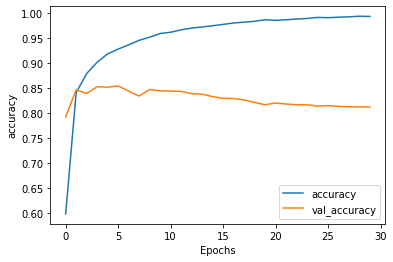

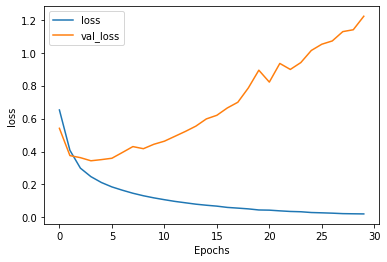

In [39]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

It can be seen the accuracy increase nicely as we trained and the validation accuracy was okay, but not great. What's interesting is the loss values, the training loss fall, but the validation loss increased.